<a href="https://colab.research.google.com/github/sarodeshreyash/OIBSIP/blob/main/Task5_SalesPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Task-5 Sales Prediction

## **By-** Shreyash Sharad Sarode

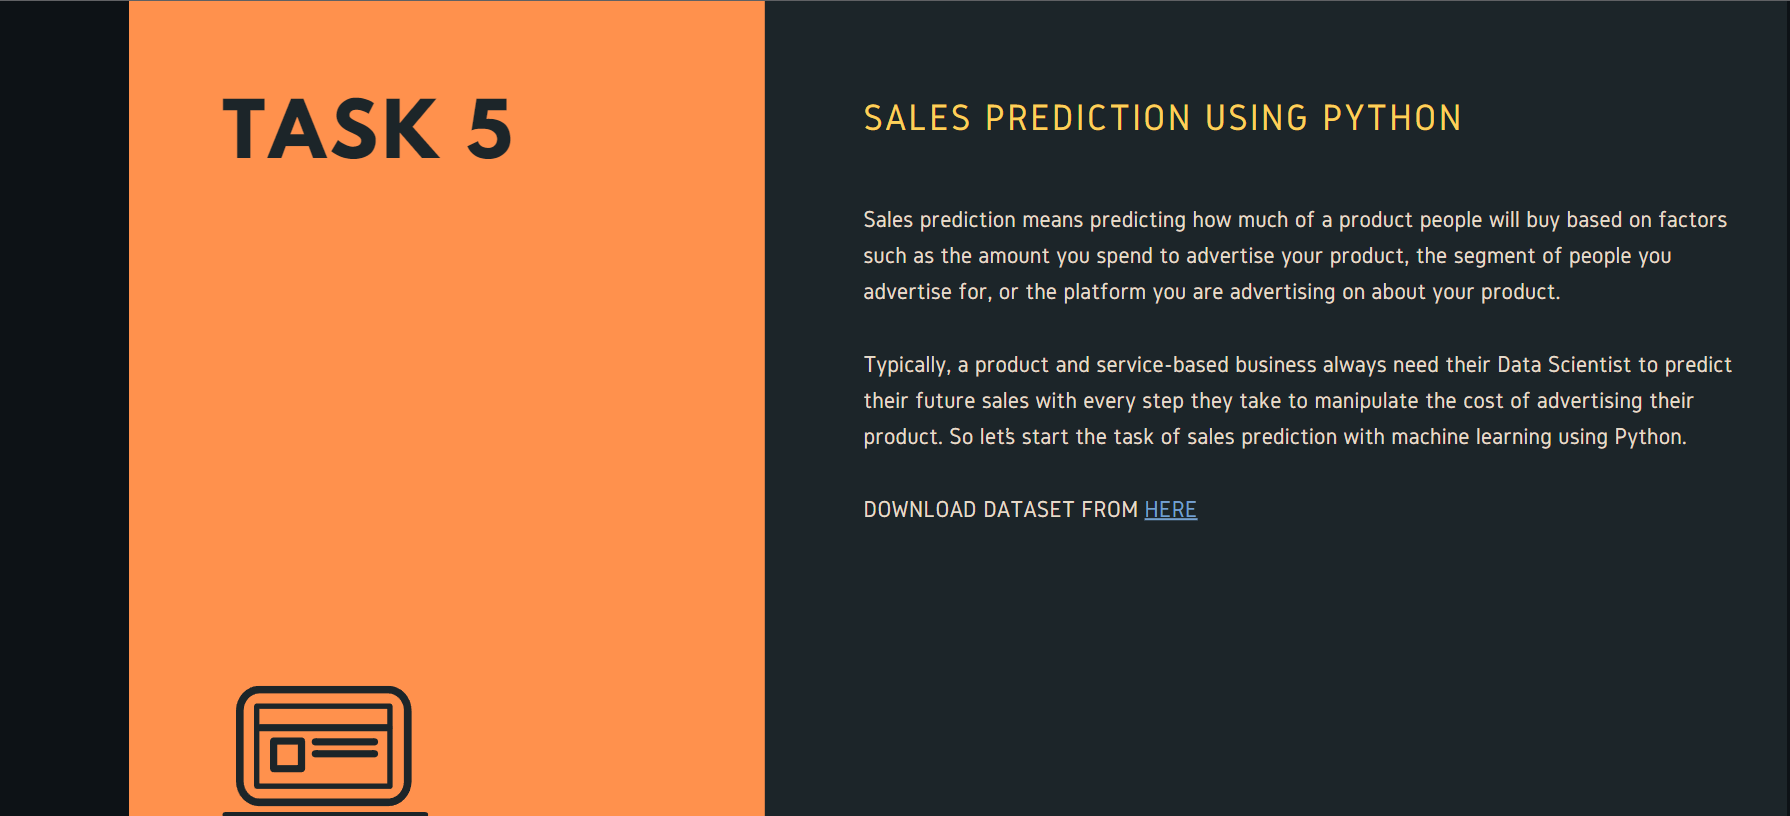

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse,r2_score as r2
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Oasis Infobyte/sales dataset/Advertising.csv')

In [4]:
#Exploring the dataset
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
#Checking for null values
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
#Checking for null values
df.duplicated().sum()

0

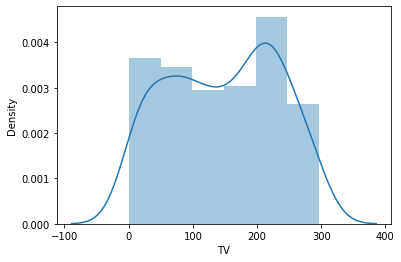

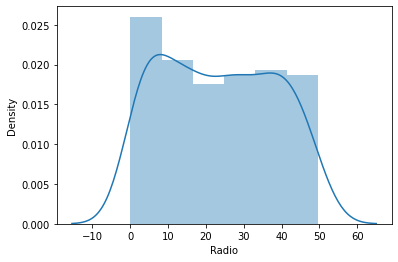

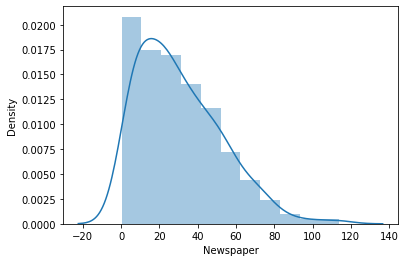

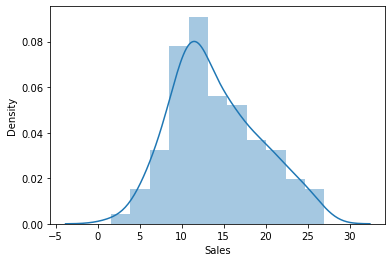

In [9]:
#Observing the distribution of variables
for i in list(df.columns)[1:]:
  sns.distplot(df[i],kde='True')
  plt.show()

### EDA

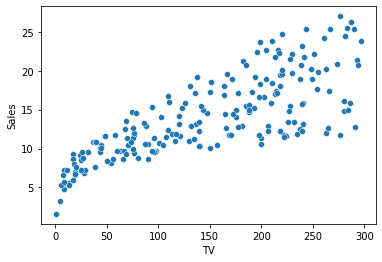

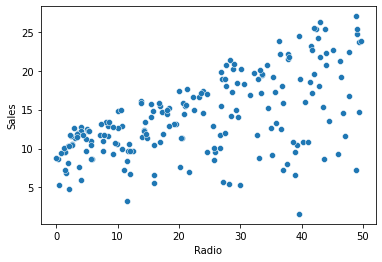

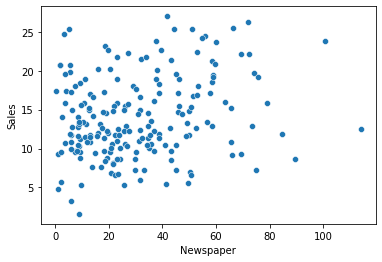

In [10]:
#Checking the relationship of the variables with the dependent variable
for i in df.columns[1:-1]:
  sns.scatterplot(x=i,y='Sales',data=df)
  plt.show()

**Inferences**


*   Tv and Sales have a clear positive correlation
*   Radio and Sales have a slight positive correlation











### Feature Engineering

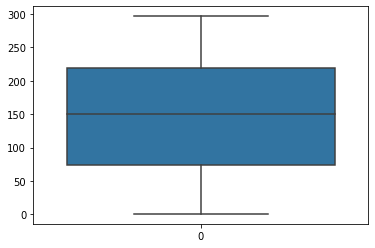

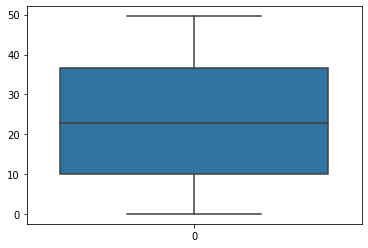

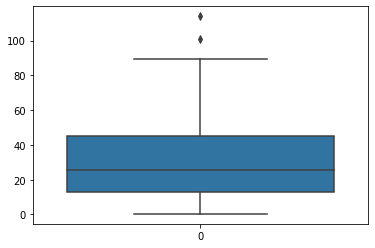

In [11]:
#Checking for outliers in the data
for i in df.columns[1:-1]:
  sns.boxplot(df[i])
  plt.show()

In [12]:
Q1=df['Newspaper'].quantile(0.25)
Q3=df['Newspaper'].quantile(0.75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
df=df[(df['Newspaper']>ll)&(df['Newspaper']<ul)]

### Data Modelling

In [13]:
#Performing train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=df.iloc[:,1:-1]
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
#Standardizing the dataset
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8989454779619588

In [16]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [17]:
#Hyperparameter tuning
params={'n_jobs':[0,1,2,4,6,8,10,20,50]}
from sklearn.model_selection import GridSearchCV
lr_opt=GridSearchCV(lr,param_grid=params,cv=5)

In [18]:
lr_opt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [0, 1, 2, 4, 6, 8, 10, 20, 50]})

In [19]:
lr_opt.best_score_

0.8751631910009072

In [20]:
y_pred=lr.predict(x_test)

In [21]:
mse(y_test,y_pred)

2.7409119066899956

In [22]:
r2_sc=r2(y_test,y_pred)
r2_sc

0.8989454779619588

In [23]:
adj_r2=1-(1-r2_sc)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [24]:
adj_r2

0.890524267792122

### Thank You !